Calculation of aeroelastic effects including

- torsional divergence
- flutter

Reference: 
https://onlinelibrary.wiley.com/doi/epdf/10.1002/9781118700440

Jan R. Wright and Jonathan E. Cooper, Introduction to Aircraft Aeroelasticity and Loads, 1st ed. (Wiley, 2014), https://doi.org/10.1002/9781118700440.

# Static Aeroelasticity

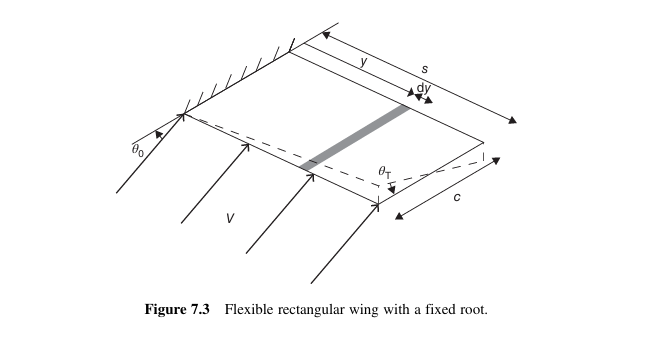

Assume linear twist distribution along the wing span

$$
\theta = {y \over s} \theta_T
$$

where $\theta$ is the twist at a point, $y$ is the y coordinate along the wing, $s$ is the semi span of the wing, and $\theta_T$ is the twist at the wing tip.

In the textbook they assume a symmetric airfoil; let's run with this here (will apply to the tail and the elevator). For our wings we will need to modify the analysis to account for the asymmetric airfoil section.

The lift on an elemental strip of the wing $d y$ is

$$
d L = q c a_W \left(\theta_0 + {y \over s} \theta_T\right) d y
$$

where $q$ is the dynamic pressure $1/2 \rho V^2$, $c$ is the chord, $a_W$ is the lift curve slope of the wing, and $\theta_0$ is the root incidence of the wing.

The total lift is found by integrating over the semi span

$$
L = \int_0^s dL = q c a_W \left(s \theta_0 + {s \over 2} \theta_T\right)
$$

The elastic potential energy is given by the strain energy due to twist. (Static analysis with no kinetic energy).

$$
U = 1/2 \int_0^s G J \left({d \theta \over d y}\right)^2 d y = {G J \over 2 s}\theta_T^2
$$

where $G$ is the shear modulus of the wing and $J$ is the polar moment of area of the wing.

An incremental twist angle is given in terms of a generalized coordinate

$$
\delta \theta = {y \over s} \delta \theta_T
$$

Now we consider the amount of work done by aerodynamic forces as the wing twists through $\delta \theta$. The moment $d M$ at a given point is given by the eccentricity of the lift from the "elastic axis" of the wing, where $ec$ is that eccentricity ($e$ in units of chord). The elastic axis is the locus of _shear centres_ along the wing -- the points where a transverse shear load must be applied to produce zero rate of twist. 

$$
dM = L ec
$$

$$
\delta W = \int_0^s d L \, e c \, \delta \theta = ... = q e c^2 a_W \left({s \theta_0 \over 2} + {s \theta_T \over 3}\right) \delta \theta_T
$$

Lagrange's equations

$$
\text{(Kinetic energy and dissipative terms)} + {\partial U \over \partial \xi_j} = {\partial \, \delta W \over \partial \, \delta \xi_j}
$$

which yields for $\xi = \theta$, 

$$
{GJ\over s}\theta_T = qec^2 a_W \left( {s \theta_0 \over 2} + {s \theta_T \over 3} \right)
$$

General form of equation:

$$
\rho V^2 \mathbf{C} (\theta + \theta_0) + \mathbf{E} \theta = 0
$$

Elastic tip twist, algebraically solved:

$$
\theta_T = {
3 q e c^2 s^2 a_W
\over 
6 G J - 2 q e c^2 s^2 a_W
}\theta_0
$$

The dynamic pressure at divergence is therefore

$$
q_W = {3 G J \over e c^2 s^2 a_W}
$$

**To adapt this to an arbitrary wing, we need:**

- the variation of the location of the elastic axis along the length of the wing,
- the variation of chord $c$ along the wing
- the variation of the location of the aerodynamic center along the wing (the quarter-chord point)
    - These two effects lead to a functional dependence of $e$ on $y$
- the variation in the shear modulus $G$ and polar moment of area $J$ along the wing
- the local lift slope $a_W(y)$ along the wing (modified slat wing theory)

Then we apply these to Lagrange's equation

$$
{\partial \over \partial \theta} \left(
{1 \over 2} \int_0^s G J \left( d \theta \over d y \right)^2 d y
\right) = 
{\partial \over \partial \, \delta \theta}
\left( \int_0^s d L \, e c \, \delta \theta \right)
$$

We need a combination of
- structural geometric factors ($J$ and the location of the elastic axis)
- material factors ($G$)
- aerodynamic factors (location of the aerodynamic centre, lift slope curve of the wing along the span).

# Section Properties

Quick reviser on the structural mechanics necessary here. We want to calculate

- The polar moment of area $J$
- The shear modulus $G$
- The location of the shear centre

We can approximate our cross-section as a rigidly attached pair of annuli:

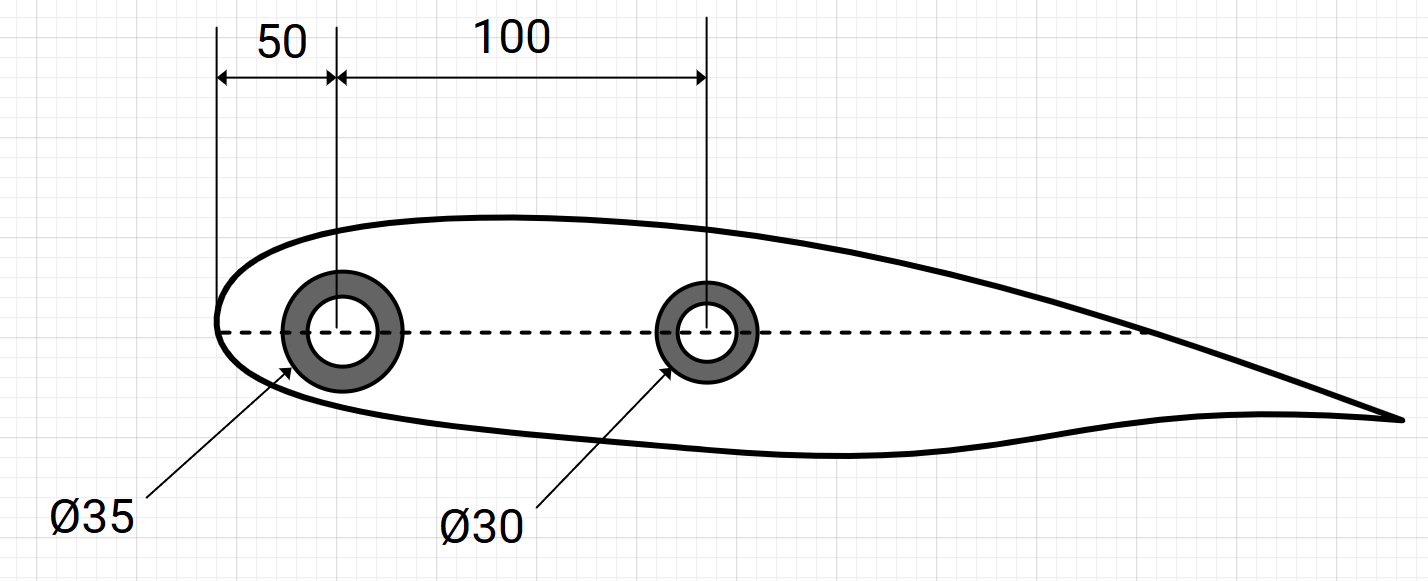

The forward tube (main spar) is a [35 mm roll wrapped tube](https://www.easycomposites.co.uk/35mm-roll-wrapped-carbon-fibre-tube-metric) with an inner radius of 32mm. The aft tube (drag spar) is a [30 mm roll wrapped tube](https://www.easycomposites.co.uk/30mm-roll-wrapped-carbon-fibre-tube-metric) with an inner radius of 27mm. At 600mm down the wing, the tubes transition into 30mm/27mm and [25mm/22mm](https://www.easycomposites.co.uk/25mm-roll-wrapped-carbon-fibre-tube-metric) respectively.

We will assume that the ribs and the skin do not contribute to the twist resistance of the wing. Note that this analysis will rely pretty heavily on the idea that the cross sections are rigidly attached to each other, so we need to make sure that the connection between the ribs and the spars is solid and well-attached. 

The center-to-center distance of the tubes is 100mm. The distance to the leading edge of the wing is 50mm. We can approximate the location of the aerodynamic center as the quarter-chord point. 

<!-- The shear centre and polar modulus are calculated analytically from the following shear flow:

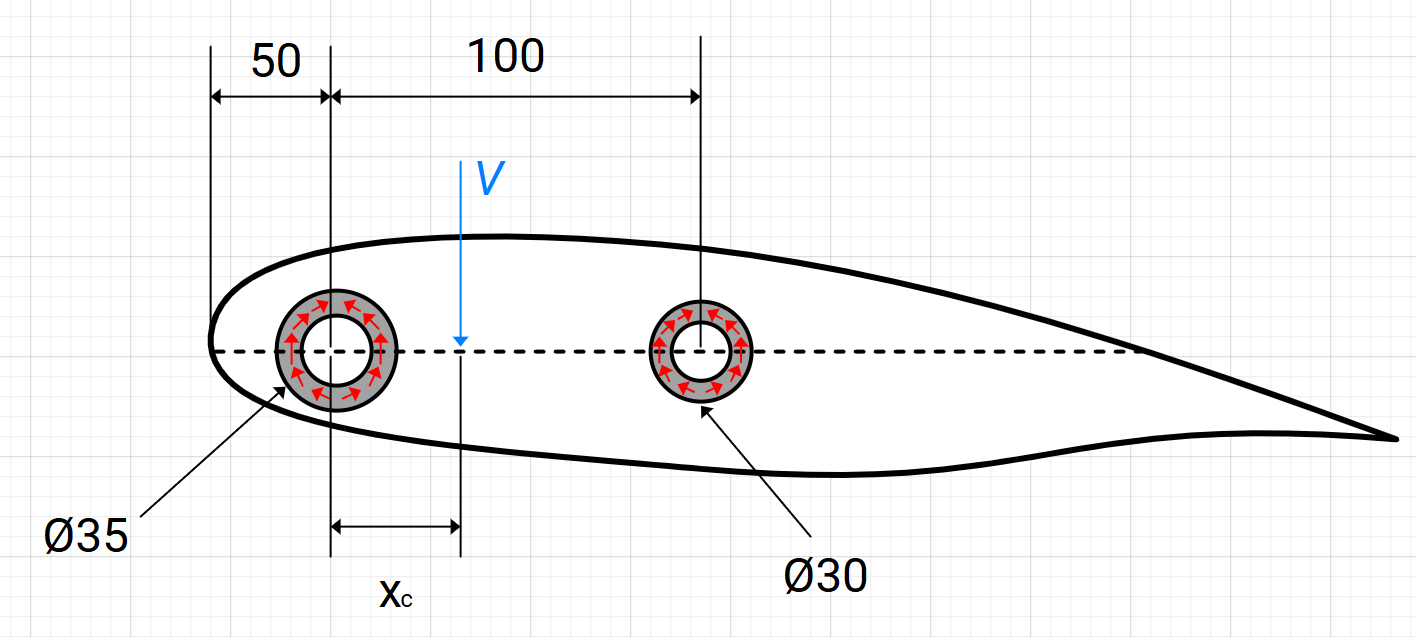 -->

Let's look at a typical rib spacing $\Delta y$. We'll put the shear centre at the origin for simplicity.

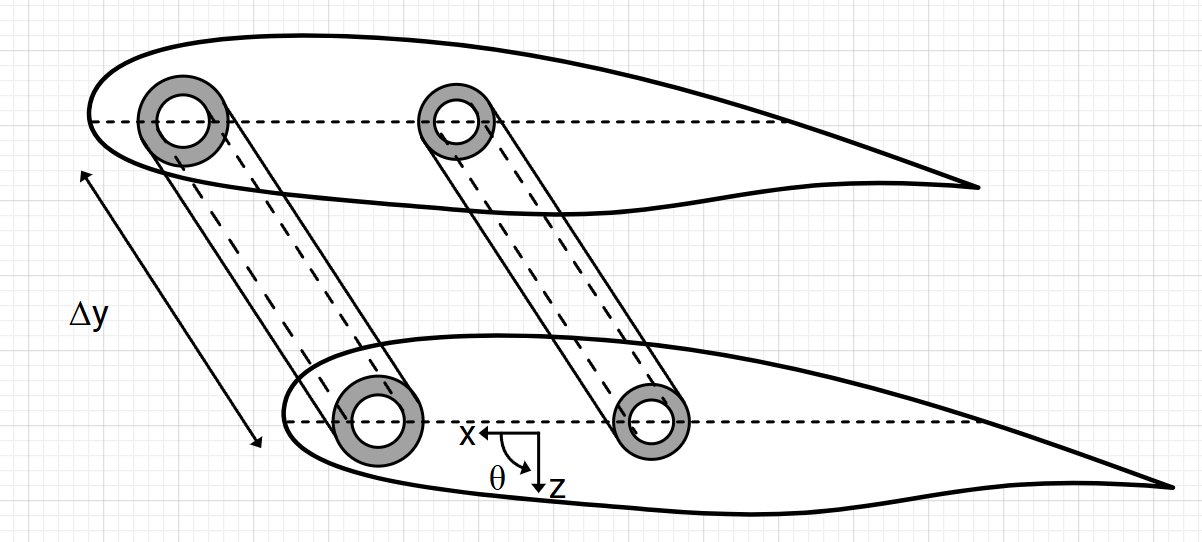

We can set up a simple balance of forces for the linear bending regime with the stiffnesses of the two beams.

$$
k_i = {E_i I_i \over (\Delta y)^3}
$$

From this analysis, the location of the shear center is

$$
{x_c \over d} = {k_2 \over k_1 + k_2} = {E_2 I_2 \over E_1 I_1 + E_2 I_2}
$$

This will do to get us started.

The resistance to rotation is 

$$
k_{T, equiv} = k_{T1} + k_{T2} = {G_1 J_1 + G_2 J_2 \over \Delta y}
$$

Mid section: 38.12701202286312 %
Outer section: 35.95284736784022 %


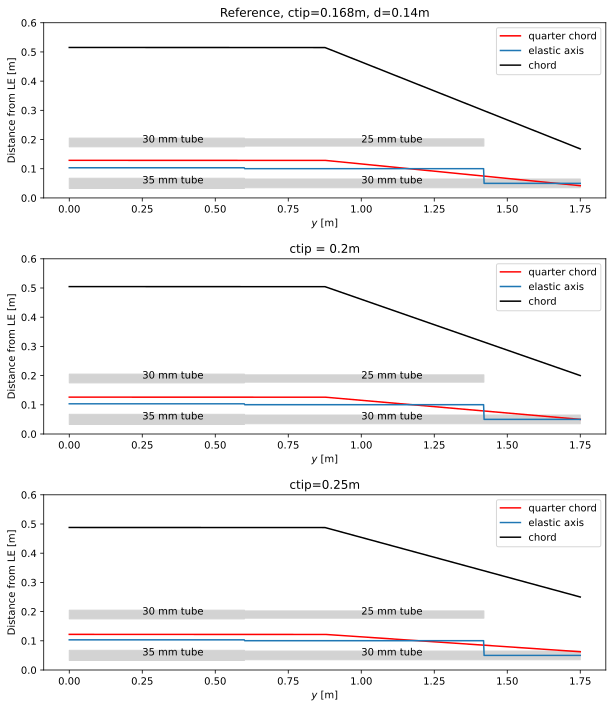

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

class Material:
    def __init__(self, E, G):
        self.E = E
        self.G = G

cfrp = Material(
    E = 64e9, # elastic modulus pascals
    G = 5e9, # shear modulus
)

class Tube:
    def __init__(self, d_outer, d_inner):
        self.d_outer = d_outer
        self.d_inner = d_inner
        
    @property
    def I(self): 
        return np.pi / 64 * (self.d_outer**4 - self.d_inner**4)

    @property
    def J(self):
        return 2 * self.I

tube_35 = Tube(35e-3, 32e-3)
tube_30 = Tube(30e-3, 27e-3)
tube_25 = Tube(25e-3, 22e-3)

d = 140e-3 # center spacing

# stiffnesses
k_35 = tube_35.I * cfrp.E
k_30 = tube_30.I * cfrp.E
k_25 = tube_25.I * cfrp.E

# shear center locations
x_35_30 = d * k_30 / (k_35 + k_30)
x_30_25 = d * k_25 / (k_30 + k_25)
x_c_1 = 50e-3
x_c_2 = x_c_1 + d

print("Mid section:", x_35_30 / d * 100, "%")
print("Outer section:", x_30_25 / d * 100 , "%")

def croot(ctip):
    A = 1.5 / 2
    L = 0.875
    # root area = croot * L
    # tapered area  = ctip * L + 1/2 (croot - ctip) * L
    # total area = A = L * (3/2 croot + 1/2 ctip)
    return (A / L - 1/2 * ctip) * 2/3    

def c(y, ctip=0.168):
    L = 0.875
    y0 = 0
    c0 = croot(ctip)
    return np.interp(y, np.array([0, L, 2*L]), np.array([c0, c0, ctip]))

def xnp(y, ctip=0.168):
    return c(y, ctip) / 4 # leading edge always at 0

def xnc(y):
    return np.interp(y, np.array([0, 0.6, 0.6, 1.42,1.42, 1.5]), np.array([x_35_30] * 2 + [x_30_25]*2 + [0]*2) + x_c_1)

def J(y):
    return np.interp(y, np.array([0, 0.6, 0.6, 1.5]), np.array([tube_35.J + tube_30.J] * 2 + [tube_30.J + tube_25.J] * 2))
    
y = np.linspace(0, 3.5/2, 1000)

r_1 = 35e-3/2
r_2 = 30e-3/2
r_3 = 25e-3/2
x_tubes = np.array([0, 0.6, 0.6, 1.75, 1.75, 0.6, 0.6, 0, 0])
x_tubes_short = np.array([0, 0.6, 0.6, 1.42, 1.42, 0.6, 0.6, 0, 0])
y_1 = x_c_1 * np.ones_like(x_tubes) + \
    np.array([-r_1, -r_1, -r_2, -r_2, r_2, r_2, r_1, r_1, -r_1])
y_2 = x_c_2 * np.ones_like(x_tubes) + \
    np.array([-r_2, -r_2, -r_3, -r_3, r_3, r_3, r_2, r_2, -r_2])
arrowprops = dict(color="k", width=1, headwidth=6)

def elliptical_c(y):
    # ellipse area = pi a b = pi c L/2
    A = 1.5 * 2 # two wings make a full ellipse
    L = 3.5/2 # semimajor axis
    c = A / (np.pi * L) # semiminor axis
    return c / L * np.sqrt(L**2 - y**2)

def torsional_divergence(y, elastic_axis, quarter_chord, chord, G, J):
    """All values as equidimensional arrays except a_W
    Returns constant components of Lagrange equation
    dU_dthT,
    dW_dth0 / q / a_W, needs to multiply theta0
    dW_thT / q / a_W, needs to multiply thetaT
    """
    e = elastic_axis - quarter_chord
    c = chord
    s = y[-1]
    dU_dthT = 1 / (s**2) * integrate.simpson(G * J, x=y)
    dW_th0 = integrate.simpson(e * c**2 * y / s, x=y)
    dW_thT = integrate.simpson(e * c**2 * (y / s)**2, x=y)
    return dU_dthT, dW_th0, dW_thT

def calculate_torsional_divergence_resid(wing, theta_0, theta_T, q, a_W=5.163):
    "Find the twist of the wing given angle of attack theta_0, lift curve slope a_W"
    dU_dthT, dW_th0, dW_thT = torsional_divergence(**wing)
    dW_dthT = q * a_W * (theta_0 * dW_th0 + theta_T * dW_thT)
    return dU_dthT * theta_T - dW_dthT

ctip = 0.168
wing = dict(
    y = y,
    elastic_axis = xnc(y),
    quarter_chord = xnp(y, ctip),
    chord = c(y, ctip),
    G = cfrp.G,
    J = J(y)
)

def plot(ctip):
    plt.fill(x_tubes, y_1, color="lightgray")
    plt.fill(x_tubes_short, y_2, color="lightgray")
    # plt.plot(y, elliptical_c(y), color="green", label="ellipse")
    plt.plot(y, xnp(y, ctip), label="quarter chord", color="red")
    plt.plot(y, xnc(y), label="elastic axis")
    plt.plot(y, c(y, ctip), label="chord", color="k")
    plt.legend(loc="upper right")
    plt.ylim(0, 0.6)
    plt.gca().set_aspect("equal")
    # plt.annotate("Safe - aerodynamic loading causes\npitch down", xy=(0.3, 0.11), xytext=(0.2, 0.3), arrowprops=arrowprops)
    # plt.annotate("May cause\ndivergence", xy=(1.60, 0.07), xytext=(1.60, 0.3), arrowprops=arrowprops)
    # plt.title("Wing properties: Quarter chord and elastic axis")
    plt.ylabel("Distance from LE [m]")
    plt.xlabel("$y$ [m]")
    plt.gcf().set_size_inches(10,10)
    plt.annotate("35 mm tube", (0.25, x_c_1))
    plt.annotate("30 mm tube", (0.25, x_c_2))
    plt.annotate("30 mm tube", (1., x_c_1))
    plt.annotate("25 mm tube", (1., x_c_2))

plt.subplot(311)
plt.title("Reference, ctip=0.168m, d=" + str(d) + "m")
plot(0.168)
plt.subplot(312)
plt.title("ctip = 0.2m")
plot(0.2)
plt.subplot(313)
plt.title("ctip=0.25m")
plot(0.25)
plt.tight_layout()
plt.savefig("figures/wing_design_ctip_d="+str(d)+".png")

In [6]:
print("average", np.mean(c(y) * .25))
print("root", c(0) * 0.25)
print("ours", 0.1 - 0.035)

average 0.10712112112112111
root 0.12885714285714286
ours 0.065


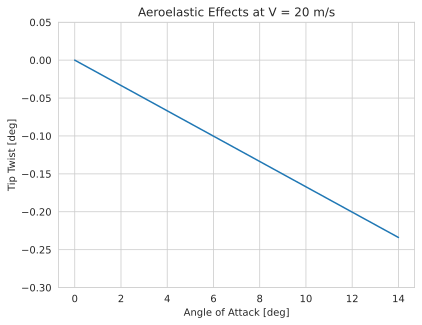

In [92]:
from scipy import optimize
import seaborn as sns
def solve_torsional_divergence(q, theta_0):
    resid = lambda theta_T: calculate_torsional_divergence_resid(
        wing = wing,
        theta_0 = theta_0,
        theta_T = theta_T[0],
        q = q
    )
    return optimize.fsolve(resid, x0=np.array([0]))
q = 0.5 * 1.23 * 20**2
solve_torsional_divergence(q, np.radians(10))
alphas = np.linspace(0, 14)
theta_Ts = np.array([solve_torsional_divergence(q, np.radians(a)) for a in alphas])
sns.set_style(style="whitegrid")
plt.plot(alphas, np.degrees(theta_Ts))
plt.title("Aeroelastic Effects at V = 20 m/s")
plt.ylabel("Tip Twist [deg]")
plt.xlabel("Angle of Attack [deg]")
plt.ylim(-0.3, 0.05)
plt.savefig("figures/tip_twist_20ms.svg")

17190.616841443374

Wing skin friction CD, 10 m/s 0.011783502949840366
Wing skin friction CD, 20 m/s 0.010258135130585069
Horiz Stabiliser skin friction CD, 10 m/s 0.002352659997083517
Horiz Stabiliser skin friction CD, 20 m/s 0.0020481094857053126
Vert Stabiliser skin friction CD, 10 m/s 0.001266816921506509
Vert Stabiliser skin friction CD, 20 m/s 0.0011028281846105531
Fuselage wetted area 0.919382377597799
Fuselage skin friction CD, 10 m/s 0.0031236404314163536
Fuselage skin friction CD, 20 m/s 0.0027192869371040554
Plane skin friction CD, 10 m/s 0.018526620299846745
Plane skin friction CD, 20 m/s 0.01612835973800499
ΔCD from gear: 0.009333333333333334
ΔCD from fuselage: 0.035666666666666666
Total drag coefficient, 10 m/s 0.06352662029984674
Total drag coefficient, 20 m/s 0.061128359738004984


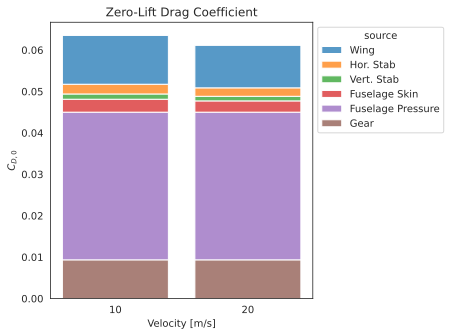

In [43]:
# Calculation of the skin friction drag due to the wing
nu = 14.88e-6 # m^2 / s

def avg_cf(V, a, b):
    # based off Blasius solution cf = 0.0576 / Re_x^0.2
    length = b - a
    antiderivative = lambda x: 0.072 * nu * (V * x / nu)**0.8 / V
    return (antiderivative(b) - antiderivative(a)) / length

A_ref = 1.5
A_wet_wing = 1.5 * 2
wing_cd0_10 = np.mean(avg_cf(10, 0, c(y))) * A_wet_wing / A_ref
wing_cd0_20 = np.mean(avg_cf(20, 0, c(y))) * A_wet_wing / A_ref
print("Wing skin friction CD, 10 m/s", wing_cd0_10)
print("Wing skin friction CD, 20 m/s", wing_cd0_20)
# H stab chord = 0.2m
# V stab chord = 0.2m
A_wet_hstab = 0.26 * 2
A_wet_vstab = 0.14 * 2
stab_cd0_10 = avg_cf(10, 0, 0.2)
stab_cd0_20 = avg_cf(20, 0, 0.2)
hstab_cd0_10 = stab_cd0_10 * A_wet_hstab / A_ref
hstab_cd0_20 = stab_cd0_20 * A_wet_hstab / A_ref
vstab_cd0_10 = stab_cd0_10 * A_wet_vstab / A_ref
vstab_cd0_20 = stab_cd0_20 * A_wet_vstab / A_ref
print("Horiz Stabiliser skin friction CD, 10 m/s", hstab_cd0_10)
print("Horiz Stabiliser skin friction CD, 20 m/s", hstab_cd0_20)
print("Vert Stabiliser skin friction CD, 10 m/s", vstab_cd0_10)
print("Vert Stabiliser skin friction CD, 20 m/s", vstab_cd0_20)
# fuselage length = 0.8m
# fuselage wetted area ~~~~ cylinder + sphere, maximum diameter = 857mm/(π)
# area of sphere = 4 π r^2, r = 857mm / (2 π)
# area of cylinder = 800mm * 857mm
r_fus = 0.857 / np.pi / 2
A_wet_fus = 4 * np.pi * r_fus**2 + 0.857 * 0.8
l_fus = (0.810 + 0.865) / 2 # average of top and bottom lengths
A_ref_fus = 0.0535
A_ratio = A_wet_fus / A_ref
fus_cd0_10 = avg_cf(10, 0, l_fus) * A_ratio
fus_cd0_20 = avg_cf(20, 0, l_fus) * A_ratio
print("Fuselage wetted area", A_wet_fus)
print("Fuselage skin friction CD, 10 m/s", fus_cd0_10)
print("Fuselage skin friction CD, 20 m/s", fus_cd0_20)

# calculate the zero-lift drag coefficient for the whole airplane
A_ref_wing = 1.5
A_ref_hstab = 0.26
A_ref_vstab = 0.14
CD_skin_10 = wing_cd0_10 + hstab_cd0_10 + vstab_cd0_10 + fus_cd0_10
CD_skin_20 = wing_cd0_20 + hstab_cd0_20 + vstab_cd0_20 + fus_cd0_20
print("Plane skin friction CD, 10 m/s", CD_skin_10)
print("Plane skin friction CD, 20 m/s", CD_skin_20)

# calculation of pressure drag due to fuselage and gear
A_gear = 35e-3 * 100e-3 * 4 # m^2
delta_CD_gear = A_gear / A_ref_wing
delta_CD_fus = A_ref_fus / A_ref_wing
delta_CD = delta_CD_gear + delta_CD_fus
CD_10 = CD_skin_10 + delta_CD
CD_20 = CD_skin_20 + delta_CD
print("ΔCD from gear:", delta_CD_gear)
print("ΔCD from fuselage:", delta_CD_fus)
print("Total drag coefficient, 10 m/s", CD_10)
print("Total drag coefficient, 20 m/s", CD_20)
CD_sources = ["Wing", "Hor. Stab", "Vert. Stab", "Fuselage Skin", "Fuselage Pressure", "Gear"] * 2
CD_amounts = [wing_cd0_10, hstab_cd0_10, vstab_cd0_10, fus_cd0_10, delta_CD_fus, delta_CD_gear,
              wing_cd0_20, hstab_cd0_20, vstab_cd0_20, fus_cd0_20, delta_CD_fus, delta_CD_gear,
             ]
velocity = ['10'] * 6 + ['20'] * 6
cd_df = dict(
    source = CD_sources,
    amount = CD_amounts,
    velocity = velocity
)
# https://stackoverflow.com/questions/59038979/stacked-bar-chart-in-seaborn
import seaborn as sns
sns.set_style(style="white")
ax = sns.histplot(cd_df, x='velocity', hue='source', weights='amount', multiple='stack', shrink=0.8)
ax.set_ylabel(r"$C_{D, 0}$")
ax.set_xlabel("Velocity [m/s]")
legend = ax.get_legend()
legend.set_bbox_to_anchor((1,1))
plt.title("Zero-Lift Drag Coefficient")
plt.tight_layout()
plt.savefig("figures/zero_lift_drag.svg")

In [16]:
c(0)

0.5154285714285715

# Calculation of the lift distribution for an arbitrary wing

NOT CURRENTLY WORKING

Reference: John D. Anderson, Fundamentals of Aerodynamics, Chap. 5.3.2

Fundamental equation of Prandtl lifting-line theory:

$$
\alpha(y_0) = {\Gamma(y_0) \over \pi V_\infty c(y_0)} +
\alpha_{L=0}(y_0) +
{1 \over 4 \pi V_\infty} \int_{-b/2}^{b/2} {(d \Gamma / d y) d y \over y_0 - y}
$$

that is, the geometric angle of attack $\alpha(y_0)$ is equal to the sum of the effective angle of attack and the induced angle of attack.

The first two terms are the effective angle of attack:

$$
\alpha_{eff} = {\Gamma(y_0) \over \pi V_\infty c(y_0)} + \alpha_{L=0}(y_0)
$$

and the last term is the induced angle of attack. This is an integro-differential equation in which the only unknown term is $\Gamma$. Can be solved with a Fourier series.

Transformation of the wing into Lagrange coordinates

$$
y = - {b \over 2} \cos \theta
$$

The circulation distribution over the wing (multiple of the lift distribution) is given by the Fourier series

$$
\Gamma(\theta) = 2 b V_\infty \sum_1^N A_n \sin n \theta
$$

with derivative

$$
{d \Gamma \over d y} = {d \Gamma \over d\theta} {d \theta \over d y} =
2 b V_\infty \sum_1^N n A_n cos n \theta {d\theta \over dy}
$$

Substituting the Fourier series for the lift distribution into the fundamental equation of lifting line theory, we have

$$
\alpha(\theta_0) = {2 b \over \pi c(\theta_0)} \sum_1^N A_n \sin n \theta_0 + \alpha_{L=0} (\theta_0) + 
\sum_1^N  n A_n {\sin n \theta_0 \over \sin \theta_0 }
$$

This is evaluated at a given spanwise location $\theta_0$; $b$, $c(\theta_0)$, and $\alpha_{L=0}(\theta_0)$ are known quantities from the geometry and the airfoil section of the wing. The only unknowns are the $A_n$. Choose $N$ different spanwise sections and evaluate the equation at each of the $N$ stations to get a coupled system of $N$ equations in $N$ unknowns. 

In matrix form,

$$
\alpha_i = \sum_n \left(
{2 b \over \pi c_i} \sin n \theta_i + (\alpha_{L=0})_i + n {\sin n \theta_i \over \sin \theta_i}
\right)
A_n
$$

$$
A_n = \sum_i \left(
{2 b \over \pi c_i} \sin n \theta_i + (\alpha_{L=0})_i + n {\sin n \theta_i \over \sin \theta_i}
\right)^{-1} \alpha_i
$$

where the inverse takes the inverse of the whole $(i, n)$-indexed matrix. We'll put $n$ across the columns and $i$ down the rows.

The lift coefficient is

$$
C_L = A_1 \pi AR
$$

The induced drag coefficient is

$$
C_{D, i} = \pi AR \sum_1^N n A_n^2 = {C_L^2 \over \pi e AR}
$$

which gives the Oswald efficiency $e$ for the wing, as desired.

/tmp/ipykernel_47968/893833076.py:25: RuntimeWarning: invalid value encountered in divide
  delta = np.sum((A_n[1:] / A_n[0])**2 * n[1:])


delta [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


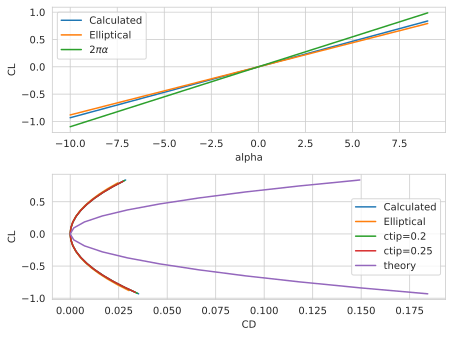

In [17]:
from numpy import newaxis as na
import seaborn as sns

def calc_cl_cd(alpha, c_fn):
    N_stations = 10
    b = 3.5
    # y_i = np.linspace(-b/2 + 1e-2, b/2 - 1e-2, N_stations)
    # c_i = c_fn(y_i)
    # theta_i = np.arccos(-2 * y_i / b)
    theta_i = np.linspace(1e-2, np.pi - 1e-2, N_stations)
    y_i = - b / 2 * np.cos(theta_i)
    c_i = c_fn(y_i)
    alpha_l0 = 0
    n = np.arange(1, y_i.shape[0] + 1)
    th_i = theta_i[:, na]
    n_j = n[na, :]
    a_eff = 2 * b / (np.pi * c_i[:, na]) * np.sin(n_j * th_i) + alpha_l0
    a_ind = n * np.sin(n_j * th_i) / np.sin(th_i)
    A_mat = a_eff + a_ind
    alpha_i = np.radians(alpha) * np.ones_like(theta_i)
    A_n = np.linalg.solve(A_mat, alpha_i)
    AR = 3.5**2 / 1.5
    CL = A_n[0] * np.pi * AR
    CDi = np.pi * AR * np.sum(A_n**2 * n)
    delta = np.sum((A_n[1:] / A_n[0])**2 * n[1:])
    return CL, CDi, delta

sns.set_style(style="whitegrid")    
alpha = np.arange(-10,10)
def calc_all(alpha, c_fn):
    n_alpha = alpha.shape[0]
    cl = np.zeros(n_alpha)
    cd = np.zeros(n_alpha)
    delta = np.zeros(n_alpha)
    for i, a in enumerate(alpha):
        cli, cdi, condi = calc_cl_cd(a, c_fn)
        cl[i] = cli
        cd[i] = cdi
        cond[i] = condi
    return cl, cd, delta

cl, cd, delta = calc_all(alpha, lambda y: c(y, 0.168))
cl_2, cd_2, delta_2 = calc_all(alpha, lambda y: c(y, 0.2))
cl_25, cd_25, delta_25 = calc_all(alpha, lambda y: c(y, 0.25))
cl_e, cd_e, delta_e = calc_all(alpha, elliptical_c)

plt.subplot(211)
plt.plot(alpha, cl, label="Calculated")
plt.plot(alpha, cl_e, label="Elliptical")
plt.plot(alpha, 2 * np.pi * np.radians(alpha), label=r"$2 \pi \alpha$")
plt.ylabel("CL")
plt.xlabel("alpha")
plt.legend()
plt.subplot(212)
AR = 3.5**2 / 1.5
K_theoretical = 1 / (np.pi * 3.5**2 / AR)
plt.plot(cd, cl, label="Calculated")
plt.plot(cd_e, cl_e, label="Elliptical")
plt.plot(cd_2, cl_2, label="ctip=0.2")
plt.plot(cd_25, cl_25, label="ctip=0.25")
plt.plot(cl**2 * K_theoretical, cl, label="theory")
plt.ylabel("CL")
plt.xlabel("CD")
plt.legend()
plt.tight_layout()

print("delta", delta)

In [18]:
delta_e

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])